In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import train & test data 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv') # example of what a submission should look like

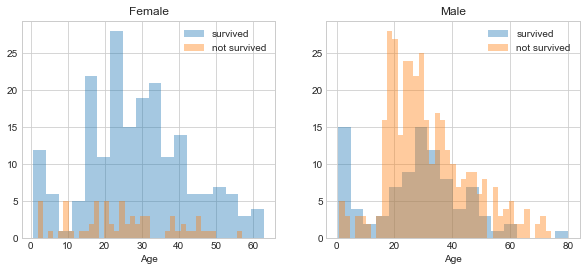

In [81]:
train.shape

(891, 12)

In [82]:
train.shape

(891, 12)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Data Descriptions
Survival: 0 = No, 1 = Yes

pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd

sex: Sex

Age: Age in years

sibsp: number of siblings/spouses aboard the Titanic

parch: number of parents/children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


What missing values are there?
Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.



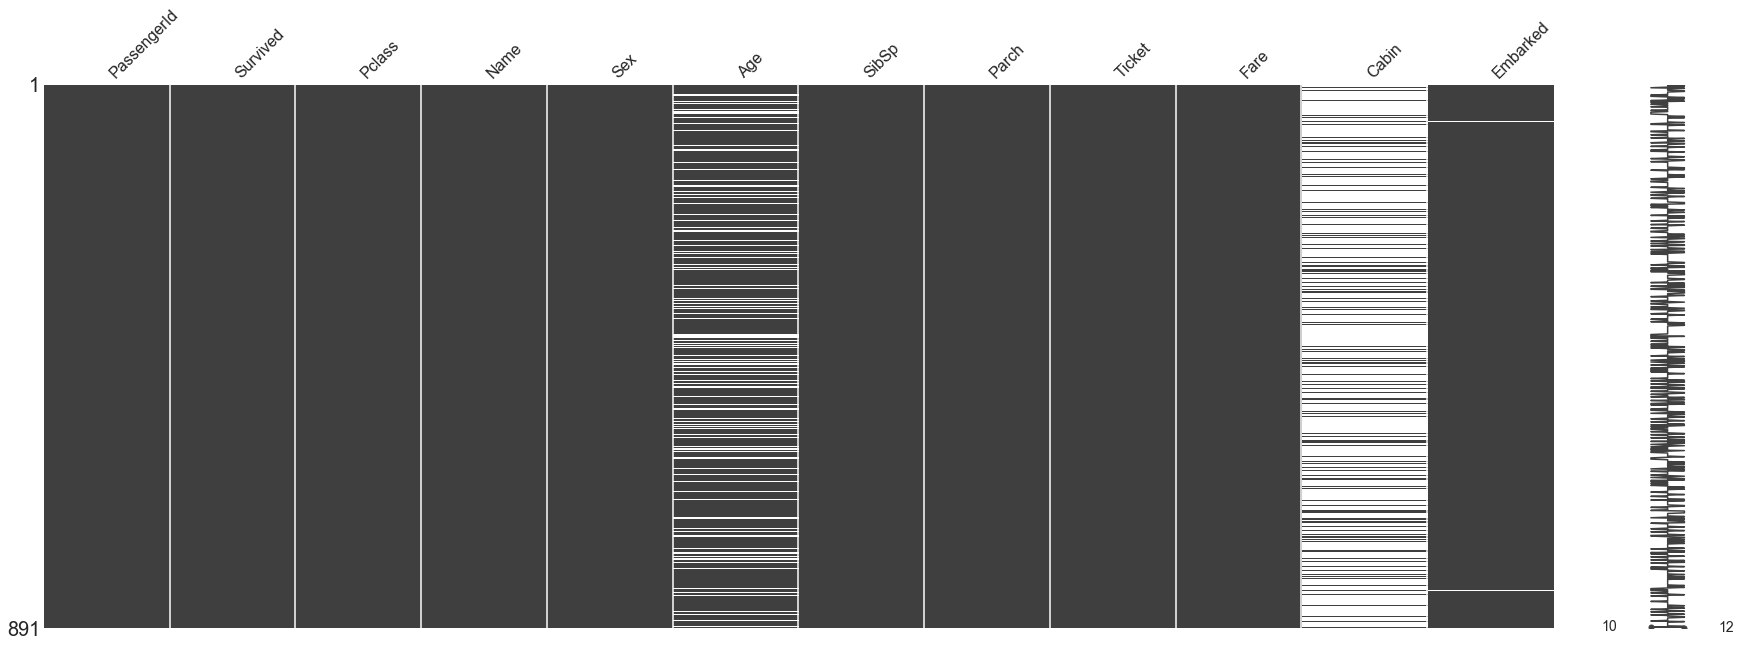

In [8]:
missingno.matrix(train,figsize=(30,10))

Ok we can clearly see some missing values here. Especially in the cabin column.

It's important to visualise missing values early so you know where the major holes are in your dataset.

Knowing this informaiton will help with your EDA and figuring out what kind of data cleaning and preprocessing is needed.

In [9]:
#Alternatively way To See the missing value 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# To perform our data analysis, let's create two new dataframes
We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.

In [10]:
df_bin=pd.DataFrame()#for discretised  continous variable
df_con=pd.DataFrame()#for continous variable

# What datatypes are in the dataframe?

In [11]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Survived
Description: Whether the passenger survived or not.

Key: 0 = did not survive, 1 = survived

This is the variable we want our machine learning model to predict based off all the others.

0    549
1    342
Name: Survived, dtype: int64


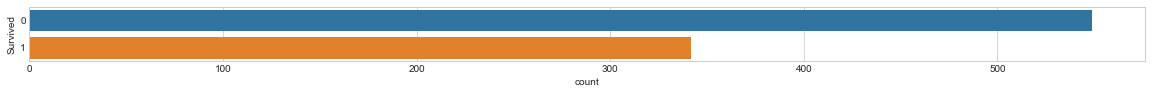

In [12]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [13]:
#lets add this to our dataframe
df_bin['Survived']=train['Survived']
df_con['Survived']=train['Survived']

In [14]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [15]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Pclass

Let's plot the distribution
We will look at the distribution of each feature first if we can to understand what kind of spread there is across the dataset.

For example, if there are values which are completely outside of the distribution, we may not want to include them in our model.

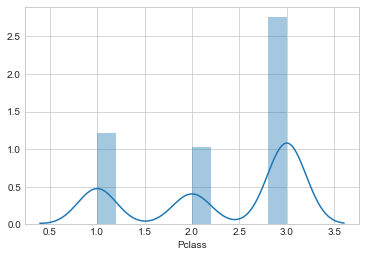

In [16]:
sns.distplot(train.Pclass)

In [17]:
train.Pclass.isnull().sum()

0

In [18]:
#lets add this to our dataframe
df_bin['Pclass']=train['Pclass']
df_con['Pclass']=train['Pclass']

In [19]:
 df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [20]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


# Name
Description: The name of the passenger.

In [21]:
train.Name.value_counts()

Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)    1
Burns, Miss. Elizabeth Margaret                                                       1
Minahan, Dr. William Edward                                                           1
Andrews, Mr. Thomas Jr                                                                1
Buss, Miss. Kate                                                                      1
                                                                                     ..
Dorking, Mr. Edward Arthur                                                            1
Spencer, Mrs. William Augustus (Marie Eugenie)                                        1
Culumovic, Mr. Jeso                                                                   1
Hagland, Mr. Ingvald Olai Olsen                                                       1
Robins, Mrs. Alexander A (Grace Charity Laury)                                        1
Name: Name, Length: 891, dtype: 

In [22]:
train.Name.isnull().sum()

0

In [23]:
def sex(x):
    if 'Miss' in x['Name']:return 1
    elif 'Mrs' in x['Name']:return 2
    else:return 3
df_bin['Name']=train.apply(sex,axis=1)
df_con['Name']=train.apply(sex,axis=1)

In [24]:
df_bin.head()

,Survived,Pclass,Name
0,0,3,3
1,1,1,2
2,1,3,1
3,1,1,2
4,0,3,3


Every row has a unique name. This is equivalent to the passenger ID. But name could be used differently.

Can you think of ways you could reduce the number of different names? Or create new features out of the names?

Note: Because of so many different names and to keep this EDA fast, we won't move forward using the name variable.



# Sex
Description: The sex of the passenger (male or female).

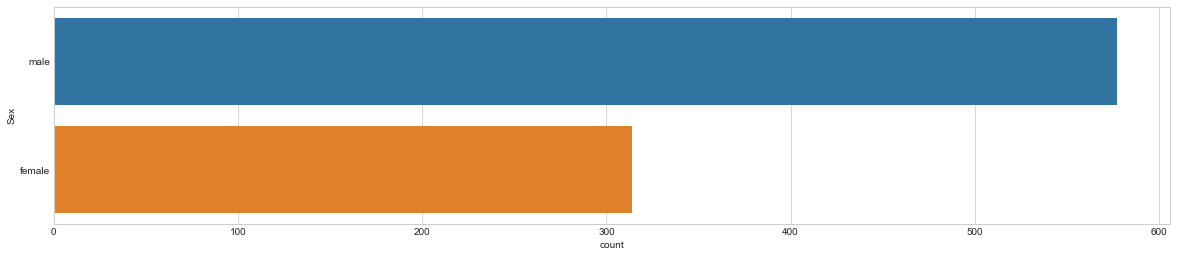

In [25]:
# Let's view the distribution of Sex
plt.figure(figsize=(20,4))
sns.countplot(y='Sex',data=train)

In [26]:
train.Sex.isnull().sum()

0


Since this is already binary variable (male or female), let's add it straight to our subset dataframes.



In [27]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [28]:
#add sex to the dataframe
df_bin['Sex']=train['Sex']
df_bin['Sex']=np.where(df_bin['Sex']=='female',1,0)# change sex to 0 for male and 1 for female
df_con['Sex'] = train['Sex']

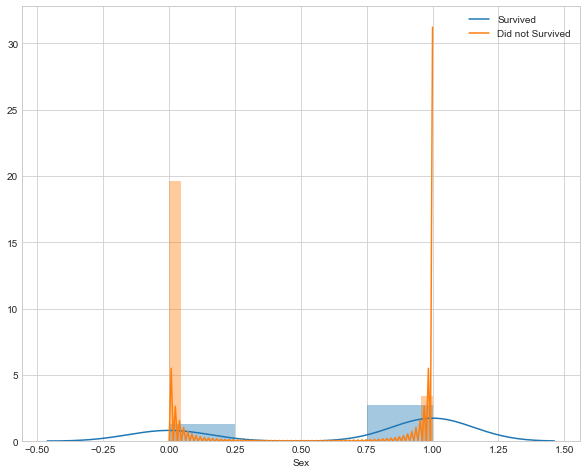

In [77]:
# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig=plt.figure(figsize=(10,8))
sns.distplot(df_bin.loc[df_bin['Survived'] ==1]['Sex'], kde_kws={'label':'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] ==0]['Sex'], kde_kws={'label':'Did not Survived'});


Majority of the female survived

# Age
Description: The age of the passenger.

In [30]:
#How many missing value does the Age have?
train.Age.isnull().sum()

177

In [31]:
#finding the average value
sum_non = (train.Age.sum())
#sum_non
non_miss_cols = len(train['Age']) -sum(train.Age.isnull())
avg_age = sum_non / non_miss_cols
avg_age = round(avg_age, 2)
avg_age

29.7

In [32]:
#filling the NAN value with the average value
df_bin['Age']=train['Age'].fillna(avg_age)
df_bin



,Survived,Pclass,Name,Sex,Age
0,0,3,3,0,22.0
1,1,1,2,1,38.0
2,1,3,1,1,26.0
3,1,1,2,1,35.0
4,0,3,3,0,35.0
...,...,...,...,...,...
886,0,2,3,0,27.0
887,1,1,1,1,19.0
888,0,3,1,1,29.7
889,1,1,3,0,26.0


In [78]:
#Defining the function
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

# SibSp
Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [34]:
train.SibSp.isnull().sum()

0

In [35]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [36]:
#add the SibSp to the dataframe
df_bin['SibSp']=train['SibSp']
df_con['SibSp']=train['SibSp']

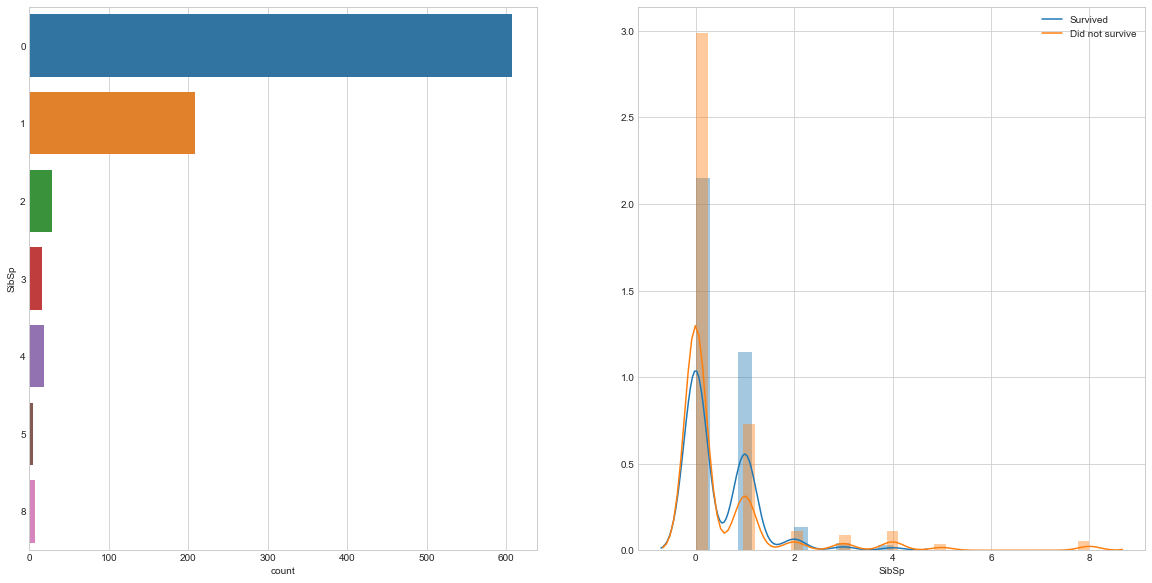

In [37]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))


# Parch
Description: The number of parents/children the passenger has aboard the Titanic.

Since this feature is similar to SibSp, we'll do a similar analysis.

In [38]:
train.Parch.isnull().sum()

0

In [39]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [40]:
#add the SibSp to the dataframe
df_bin['Parch']=train['Parch']
df_con['Parch']=train['Parch']

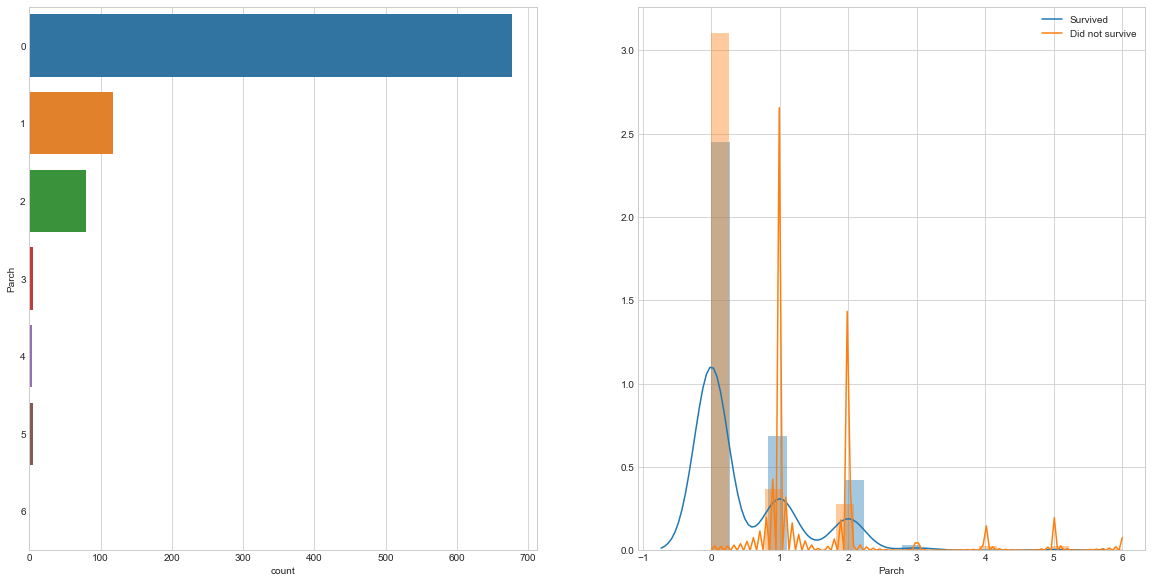

In [41]:
# Visualise the counts of Parch and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

In [42]:
df_con.head()

,Survived,Pclass,Name,Sex,SibSp,Parch
0,0,3,3,male,1,0
1,1,1,2,female,1,0
2,1,3,1,female,0,0
3,1,1,2,female,1,0
4,0,3,3,male,0,0


In [43]:
df_bin.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,0,3,3,0,22.0,1,0
1,1,1,2,1,38.0,1,0
2,1,3,1,1,26.0,0,0
3,1,1,2,1,35.0,1,0
4,0,3,3,0,35.0,0,0


In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Ticket
Description: The ticket number of the boarding passenger.

In [45]:
train.Ticket.isnull().sum()

0

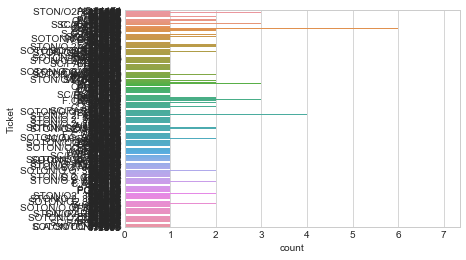

In [46]:
sns.countplot(y='Ticket',data=train)

Another way to find the number of tickets

In [47]:
#how many kind of ticket are there
train.Ticket.value_counts()

CA. 2343             7
1601                 7
347082               7
CA 2144              6
347088               6
                    ..
SOTON/O.Q. 392078    1
SCO/W 1585           1
A/5 3902             1
17463                1
382651               1
Name: Ticket, Length: 681, dtype: int64

In [48]:
 #How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


# Fare
Description: How much the ticket cost.

In [49]:
train.Fare.isnull().sum()

0

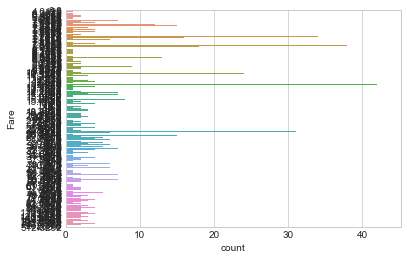

In [50]:
sns.countplot(y='Fare',data=train)

In [51]:
#How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


In [52]:
# Add Fare to sub dataframes
df_con['Fare']=train['Fare']
df_bin['Fare']=pd.cut(train['Fare'],bins=5)

In [53]:
# What do our Fare bins look like?
df_bin.Fare.value_counts()



(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

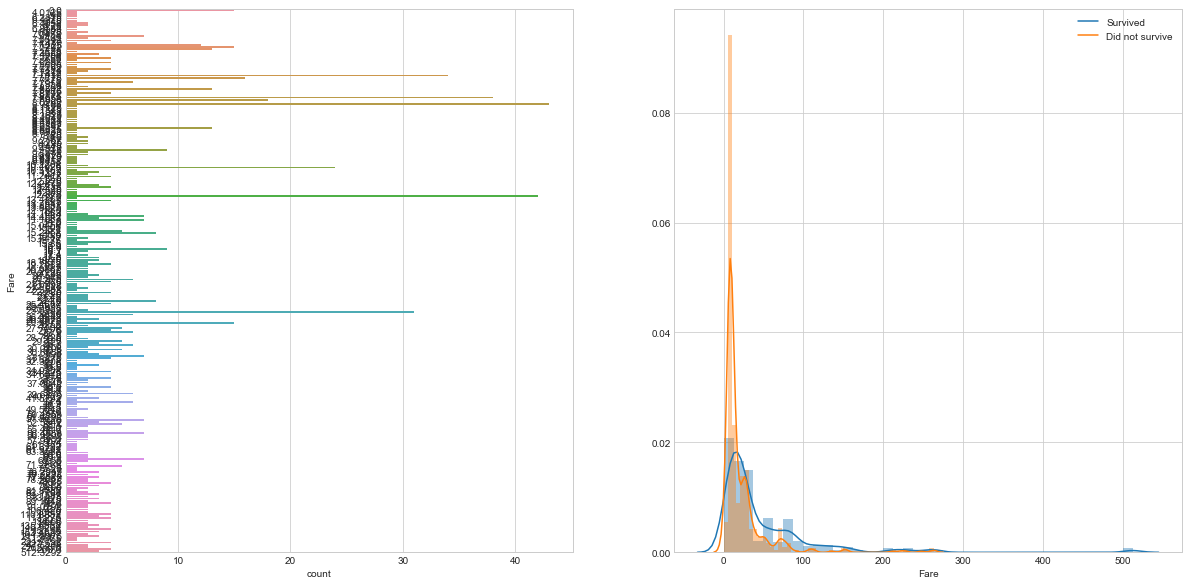

In [79]:
# Visualise the counts of Tickets and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20, 10))

# Cabin
Cabin number where the passenger was staying at

In [55]:
train.Cabin.isnull().sum()

687

In [56]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
E101           3
              ..
A16            1
E49            1
C128           1
C106           1
B38            1
Name: Cabin, Length: 147, dtype: int64

Since there are too many missing values, we won't use Cabin for our initial models and won't add it to our sub dataframes.

# Embarked
Description: The port where the passenger boarded the Titanic.

Key: C = Cherbourg, Q = Queenstown, S = Southampton



In [57]:
#missing value in Embarked
train.Embarked.isnull().sum()

2

In [58]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

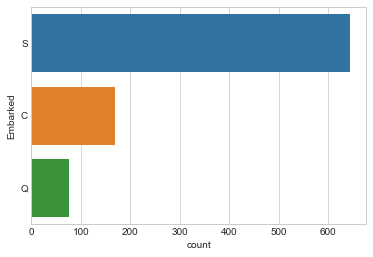

In [59]:
sns.countplot(y='Embarked',data=train)

In [60]:
#adding dataframe to the subDataframe
df_bin['Embarked']=train['Embarked']
df_con['Embarked']=train['Embarked']

In [61]:
print(len(df_con))
df_bin=df_bin.dropna(subset=['Embarked'])
df_con=df_con.dropna(subset=['Embarked'])
print(len(df_con))



891
889


We've removed the two rows with missing values for Embarked, now we can add Embarked to our sub dataframes


# Encoding

Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.

We will encode our binned dataframe (df_bin) with one-hot encoding and our continuous dataframe (df_con) with the label encoding function from sklearn.

In [62]:
df_bin.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,3,0,22.0,1,0,"(-0.512, 102.466]",S
1,1,1,2,1,38.0,1,0,"(-0.512, 102.466]",C
2,1,3,1,1,26.0,0,0,"(-0.512, 102.466]",S
3,1,1,2,1,35.0,1,0,"(-0.512, 102.466]",S
4,0,3,3,0,35.0,0,0,"(-0.512, 102.466]",S


In [63]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Name_1,Name_2,Name_3,Sex_0,Sex_1,Age_0.42,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [64]:
df_con.head(10)

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,0,3,3,male,1,0,7.2500,S
1,1,1,2,female,1,0,71.2833,C
2,1,3,1,female,0,0,7.9250,S
3,1,1,2,female,1,0,53.1000,S
4,0,3,3,male,0,0,8.0500,S
5,0,3,3,male,0,0,8.4583,Q
6,0,1,3,male,0,0,51.8625,S
7,0,3,3,male,3,1,21.0750,S
8,1,3,2,female,0,2,11.1333,S
9,1,2,2,female,1,0,30.0708,C


In [65]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [66]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [67]:
# Let's look at df_con_enc
df_con_enc.head(20)


,Survived,Name,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,3,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,2,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,2,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,3,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,3,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,3,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,2,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,2,1,0,30.0708,1,0,0,1,0,0,1,0


# Start Building Machine Learning Models

 Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

# Let's seperate the data

In [68]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [69]:
selected_df.head()

,Survived,Name,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,3,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,2,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,2,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,3,0,0,8.0500,0,0,1,0,1,0,0,1


In [70]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [71]:
# Shape of the data (without labels)
X_train.shape


(889, 12)

In [72]:
X_train.head()

,Name,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,3,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,2,1,0,53.1000,0,0,1,1,0,1,0,0
4,3,0,0,8.0500,0,0,1,0,1,0,0,1


In [73]:
# Shape of the labels
y_train.shape

(889,)

# Define a function to fit machine learning algorithms

Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [74]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

# Logistic Regression

In [75]:
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.3
Running Time: 0:00:06.683607


# K-Nearest Neighbours

In [76]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 84.14
Accuracy CV 10-Fold: 77.17
Running Time: 0:00:00.320227
